<a href="https://colab.research.google.com/github/AnjaliPaul91/AnjaliPaul91/blob/main/Case_Study_06_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Case Study #06 -Data Preprocessing

1.Load the dataset into python environment 2.Make ‘PassengerId’ as the index column 3.Check the basic details of the dataset 4.Fill in all the missing values present in all the columns in the dataset 5.Check and handle outliers in at least 3 columns in the dataset 6.Do min max scaling on the feature set (Take ‘Survived’ as target)

In [1]:
# importing necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

1.Load the dataset into python environment

In [2]:
# data stores in the variable titan
titan = pd.read_csv('titanic_dataset.csv')

In [3]:
titan.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titan.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
titan.shape

(891, 12)

In [6]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titan.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Insights: The dataset contains 891 rows and 12 columns. And various columns conatains null values. The above displaying the number of null values in different columns.

Make ‘PassengerId’ as the index column

In [9]:
titan1 = titan.set_index('PassengerId')
titan1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


891 rows × 11 columns

Explanation: The number of columns reduced to 11.

Check the basic details of the dataset(The dataset with index column PassengerId)

In [10]:
titan1.shape

(891, 11)

In [11]:
titan1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
titan1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
titan1.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Text(0.5, 1.0, 'Missing values heatmap')

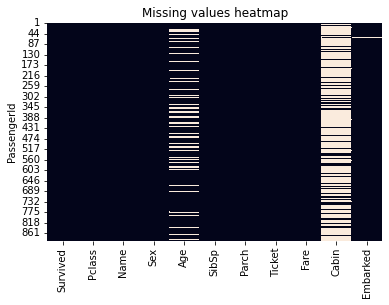

In [14]:
sns.heatmap(titan1.isnull(), cbar = False).set_title("Missing values heatmap")

Insights: The newly indexed dataset named 'titan1' consists 891 rows and 9 columns. Using the info function the basic information of the dataset is displayed. The column named 'Age' contains 177 null values. 'Cabin' contains 687 null values and is a object type data. 'Embarked' contains two null values.

4.Fill in all the missing values present in all the columns in the dataset.

In [16]:
updated_titan1 = titan1.dropna(axis=1)

In [17]:
updated_titan1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 62.6+ KB


In [18]:
updated_titan1.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


Text(0.5, 1.0, 'Missing values heatmap')

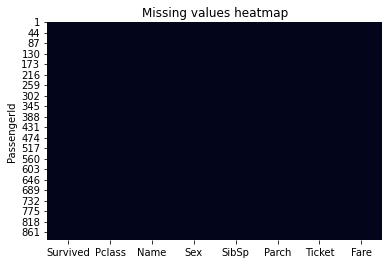

In [19]:
#checking the null values with heatmap
sns.heatmap(updated_titan1.isnull(), cbar = False).set_title("Missing values heatmap")

Insight: It is clear from the heatmap that currently no null values are present in the dataset.

Check and handle outliers in at least 3 columns in the dataset
5.1 Checking in the column 'Survived'

Text(0.5, 1.0, 'Box plot of Survived')

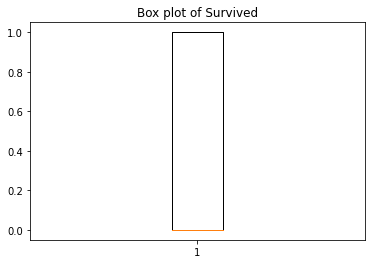

In [20]:
plt.boxplot(updated_titan1['Survived'])
plt.title('Box plot of Survived')

Insight: No otliers are present in the column 'Survived'

5.2 Checking in the column 'Fare'

Text(0.5, 1.0, 'Box plot of Fare')

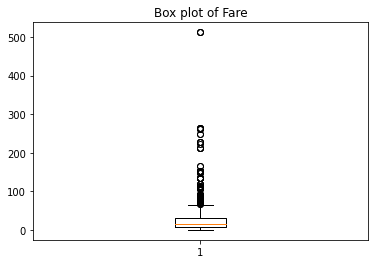

In [21]:
plt.boxplot(updated_titan1['Fare'])
plt.title('Box plot of Fare')

In [22]:
Q1 = np.percentile(updated_titan1['Fare'], 25, interpolation='midpoint')
Q2 = np.percentile(updated_titan1['Fare'], 50, interpolation='midpoint')
Q3 = np.percentile(updated_titan1['Fare'], 75, interpolation='midpoint')
Q1,Q2,Q3

(7.9104, 14.4542, 31.0)

In [23]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
outlier = []
for x in updated_titan1['Fare']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

Insight: Since this column "Fare" , although we looks by the method outliers exists but as considering the context these are not outliers. So we keep it as it is. The fare changes as its depends on so many factors.

5.3 Checking in the column 'SibSp'

Text(0.5, 1.0, 'Box plot of SibSp')

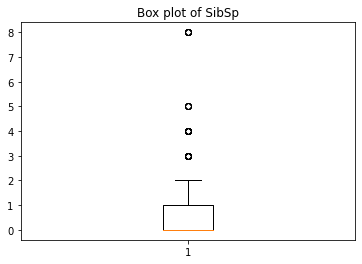

In [24]:
plt.boxplot(updated_titan1['SibSp'])
plt.title('Box plot of SibSp')

In [25]:
Q1 = np.percentile(updated_titan1['SibSp'], 25, interpolation='midpoint')
Q2 = np.percentile(updated_titan1['SibSp'], 50, interpolation='midpoint')
Q3 = np.percentile(updated_titan1['SibSp'], 75, interpolation='midpoint')

In [26]:
Q1,Q2,Q3

(0.0, 0.0, 1.0)

In [27]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [28]:
outlier = []
for x in updated_titan1['SibSp']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [29]:
index1 = updated_titan1['SibSp'] > up_lim
updated_titan1.loc[index1].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [30]:
titan2 = updated_titan1.drop([ 8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864])
titan2

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500


845 rows × 8 columns

Text(0.5, 1.0, 'Box plot of SibSp')

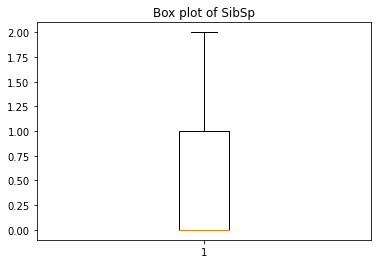

In [31]:
# Checking the null values are removed
plt.boxplot(titan2['SibSp'])
plt.title('Box plot of SibSp')

Insight: From the boxplot it is clear that all the outliers indexed above are removed.

6.Do min max scaling on the feature set (Take ‘Survived’ as target)

In [32]:
titan2.describe()

,Survived,Pclass,SibSp,Parch,Fare
count,845.00000,845.000000,845.000000,845.000000,845.000000
mean,0.39645,2.279290,0.313609,0.317160,31.120305
std,0.48945,0.840396,0.530909,0.765829,48.973215
min,0.00000,1.000000,0.000000,0.000000,0.000000
25%,0.00000,1.000000,0.000000,0.000000,7.895800
50%,0.00000,3.000000,0.000000,0.000000,13.000000
75%,1.00000,3.000000,1.000000,0.000000,30.000000
max,1.00000,3.000000,2.000000,6.000000,512.329200


In [33]:
titan2.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Fare'],
      dtype='object')

In [34]:
# Creating a linear Regression Model
y = titan2['Survived']
x = titan2.drop(['Survived','Name','Sex','Ticket'],axis =1)

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = .25)

In [36]:
from sklearn import linear_model

In [37]:
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
print("MSE is", mean_squared_error(y_test,predictions))

MSE is 0.18476408551667733


In [40]:
from sklearn.metrics import r2_score

In [41]:
print("R squared value is", r2_score(y_test,predictions))

R squared value is 0.19182121075800018


In [42]:
titan2.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Fare'],
      dtype='object')

In [43]:
titan2

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500


In [44]:
X = titan2.drop(['Name','Sex','Ticket'],axis = 1)
X

,Survived,Pclass,SibSp,Parch,Fare
PassengerId,,,,,
1,0,3,1,0,7.2500
2,1,1,1,0,71.2833
3,1,3,0,0,7.9250
4,1,1,1,0,53.1000
5,0,3,0,0,8.0500
...,...,...,...,...,...
887,0,2,0,0,13.0000
888,1,1,0,0,30.0000
889,0,3,1,2,23.4500


In [45]:
X.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [46]:
type(X)

pandas.core.frame.DataFrame

In [47]:
min_max = preprocessing.MinMaxScaler(feature_range = (0,1))

In [48]:
X = min_max.fit_transform(X)

In [49]:
X

array([[0.        , 1.        , 0.5       , 0.        , 0.01415106],
       [1.        , 0.        , 0.5       , 0.        , 0.13913574],
       [1.        , 1.        , 0.        , 0.        , 0.01546857],
       ...,
       [0.        , 1.        , 0.5       , 0.33333333, 0.04577135],
       [1.        , 0.        , 0.        , 0.        , 0.0585561 ],
       [0.        , 1.        , 0.        , 0.        , 0.01512699]])

Conclusion: So the values are scaled into the respective rane(0,1). The we need to verify does this scaling affect the data
    by using with linear regression model as we done previously.

In [52]:
# Checking does the min_max scaling affect the model

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = .25)
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)
print("MSE is", mean_squared_error(y_test,predictions))
print("R squared value is", r2_score(y_test,predictions))

MSE is 0.18476408551667733
R squared value is 0.19182121075800018
